# Time series - General exploration
Adapted from: https://www.machinelearningplus.com/time-series/time-series-analysis-python/#:~:text=Time%20series%20is%20a%20sequence,in%20Python%20%E2%80%93%20A%20Comprehensive%20Guide.

**Import libraries & load data**

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
%matplotlib inline

In [ ]:
#Get working directory
os.getcwd()

In [ ]:
#Set working directory
os.chdir('C:\\Users\\Casper Damen\\DiP\\Python klasje\\data')

In [3]:
df = pd.read_csv('zoekopdracten_jan2019_july2020.csv')

In [4]:
df.head()

,timestamp__to_date,searches,sessions
0,2019-11-26,2554,18659
1,2020-07-20,2509,36260
2,2020-07-01,2376,44005
3,2020-07-27,2359,38313
4,2020-07-06,2333,38421


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   timestamp__to_date  578 non-null    object
 1   searches            578 non-null    int64 
 2   sessions            578 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.7+ KB


## Data preprocessing

In [145]:
#Preprocessing functions
def change_dtype(dataf):
    
    new_df = (dataf
                .assign(date= lambda d: pd.to_datetime(d['timestamp__to_date']))
             )
    
    return new_df

def add_ratio(dataf):
    
    new_df = (dataf
              .assign(searches_per_session = round(dataf['searches'] / dataf['sessions'], 3))
             )
        
    return new_df

def add_date_parts(dataf):
    
    new_df = (dataf
              .assign(year = lambda d: d['date'].dt.year,
                      month_number = lambda d: d['date'].dt.month,
                      month_name = lambda d: d['date'].dt.strftime('%B'),
                      day_number =  lambda d: d['date'].dt.dayofweek,
                      day_name =  lambda d: d['date'].dt.strftime('%A'),
                      week = lambda d: d['date'].dt.strftime('%W'))
             )
        
    return new_df
    

def keep_columns(dataf):
    
    new_df = (dataf[['date', 'searches', 'sessions', 
                   'searches_per_session', 'year', 'month_number', 
                   'month_name', 'day_number', 'day_name', 'week']]
             )
    
    
    return new_df

def filter_months(dataf):
    
    new_df = (dataf
              .loc[dataf['month_number'] < 8]
             )
    
    return new_df

def filter_years(dataf):
    
    new_df = (dataf
              .loc[dataf['year'] == 2020]
             )
    
    return new_df

def date_index(dataf):
    
    sort_df = (dataf
               .set_index('date')
               .sort_index()
              )
    
    return sort_df

In [146]:
clean_df = (df
            .pipe(change_dtype)
            .pipe(add_ratio)
            .pipe(add_date_parts)
            .pipe(keep_columns)
            .pipe(filter_months)
            .pipe(filter_years)
            .pipe(date_index)
           )

In [113]:
clean_df.head()

,searches,sessions,searches_per_session,year,month_number,month_name,day_number,day_name,week
date,,,,,,,,,
2020-01-01,602,9218,0.07,2020,1,January,2,Wednesday,00
2020-01-02,1284,17588,0.07,2020,1,January,3,Thursday,00
2020-01-03,1246,16371,0.08,2020,1,January,4,Friday,00
2020-01-04,908,11299,0.08,2020,1,January,5,Saturday,00
2020-01-05,869,12477,0.07,2020,1,January,6,Sunday,00


## Data exploration

In [9]:
clean_df.describe()

,searches,sessions,searches_per_session,year,month_number,day_number
count,213.000000,213.000000,213.000000,213.0,213.00000,213.000000
mean,1224.582160,21206.300469,0.059416,2020.0,4.00939,3.000000
std,467.296176,8629.378176,0.012548,0.0,2.00939,1.992912
min,349.000000,7333.000000,0.032442,2020.0,1.00000,0.000000
25%,851.000000,13845.000000,0.049027,2020.0,2.00000,1.000000
50%,1162.000000,20953.000000,0.057660,2020.0,4.00000,3.000000
75%,1566.000000,25668.000000,0.069622,2020.0,6.00000,5.000000
max,2509.000000,50661.000000,0.098776,2020.0,7.00000,6.000000


In [10]:
print(clean_df.index.min())
print(clean_df.index.max())

2020-01-01 00:00:00
2020-07-31 00:00:00


In [11]:
#Set style
sns.set_style('whitegrid')

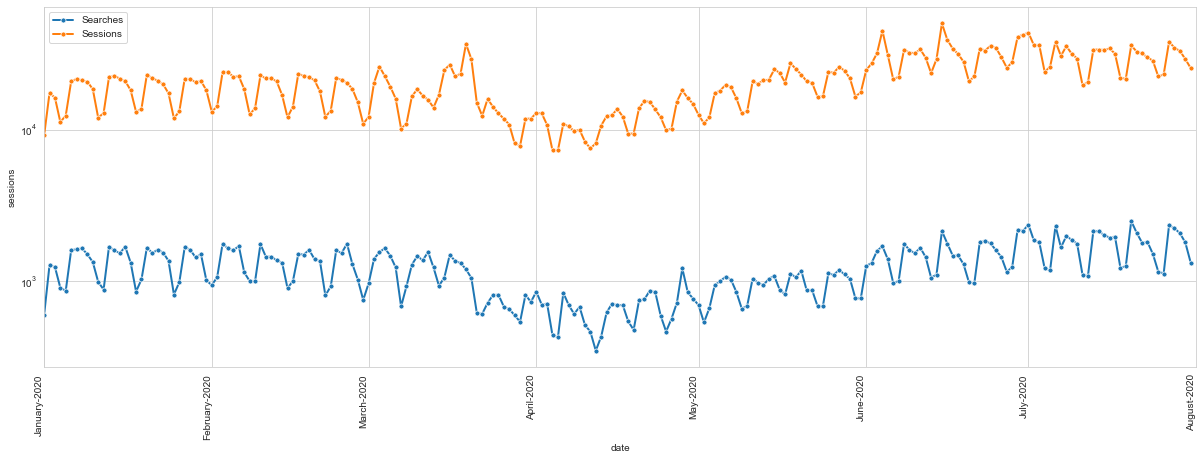

In [114]:
#Create object to plot on
fig = plt.figure(figsize=(16,5))
ax = fig.add_axes([0,0,1,1])

#Determine frequency of date that is shown
ax.xaxis.set_major_locator(mdates.MonthLocator())

#Choose tick format
year_month_fmt = mdates.DateFormatter('%B-%Y')
ax.xaxis.set_major_formatter(year_month_fmt)

#Set minimum and maximum of x axis
ax.set_xlim([dt.datetime(2020, 1, 1, 0), dt.datetime(2020, 8, 1, 0)])

#Plot chart showing development of search and sessions
sns.lineplot(x=clean_df.index, y='searches', data=clean_df, marker='o', lw=2, ms=5, ax=ax, label='Searches')
sns.lineplot(x=clean_df.index, y='sessions', data=clean_df, marker='o', lw=2, ms=5, ax=ax, label='Sessions')

#Rotate x ticks
fig.autofmt_xdate(rotation=90)

#Set logaritmic scale for comparison
ax.set(yscale="log")

#Show legend
ax.legend();

In [13]:
#Functions to order the months and days
def order_months(dataf):
    
    return (dataf
            .groupby(['month_name', 'month_number'])
            .count()
            .sort_values(by='month_number')
            .index
            .get_level_values(0)
           )

def order_days(dataf):
    
    return (dataf
            .groupby(['day_name', 'day_number'])
            .count()
            .sort_values(by='day_number')
            .index
            .get_level_values(0)
           )  

**Monthly & daily trend**

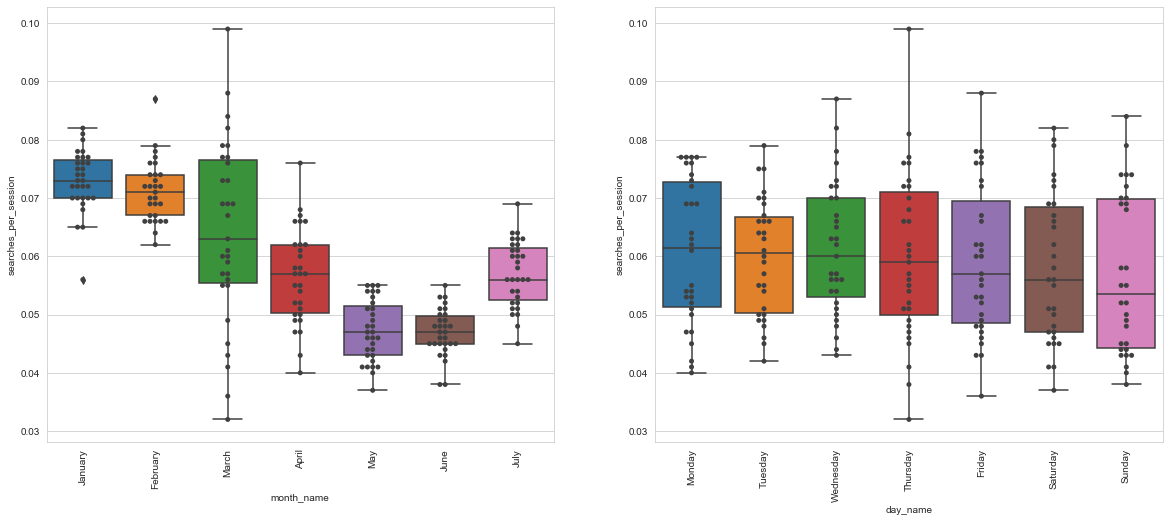

In [118]:
#Create variables to order the month_name and day_name based on index
ordered_months = order_months(clean_df)
ordered_days = order_days(clean_df)

#Boxplots of the search/session ratio per year, month, week and day of week
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
sns.boxplot(x='month_name', y='searches_per_session', data=clean_df, ax=ax1, order=ordered_months)
sns.boxplot(x='day_name', y='searches_per_session', data=clean_df, ax=ax2, order=ordered_days)

#Use swarmplot to also show underlying datapoints
sns.swarmplot(x='month_name', y='searches_per_session', data=clean_df, ax=ax1, order=ordered_months, color='.25')
sns.swarmplot(x='day_name', y='searches_per_session', data=clean_df, ax=ax2, order=ordered_days, color='.25')

#Rotate xticks
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90);

## Modelling

**Moving averages**

In [71]:
#Function to create dataframe with moving averages
#Takes the dataframe together with the actual time series value column as input
#Use the window argument to determine the moving window
def moving_average_df(dataf, value_column, window=5):
    
    rolling_df = (dataf
                  .assign(searches_per_session_moving = (dataf
                                                        .loc[:,value_column]
                                                        .rolling(window)
                                                        .mean()
                                                        )
                         )
                 )
                          
    return rolling_df

#Function to plot rolling average together with true values
#Takes the dataframe together with the actual time series value column as input
#Use max moving days argument to determine the different moving averages you want to include
def plot_moving_average(dataf, value_column, max_moving_days=6):
    
    #Configuring ax object
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18,14), sharex=True, sharey=True)
        
   

    #Plot the acctual searches per session
    ax_list = fig.axes
    for ax in fig.axes:
        #PLot actual searches
        sns.lineplot(x=dataf.index, y=value_column, 
                     data=dataf, 
                     ax=ax, 
                     label='Actual searches',
                     alpha=0.7
                    )
    
    
    #Plot moving averages
    for days,ax in zip(range(1,max_moving_days+1), ax_list):
        
        sns.lineplot(x=dataf.pipe(moving_average_df, value_column, window=days).index, y='{}_moving'.format(value_column), 
                     data=clean_df.pipe(moving_average_df, value_column, window=days), 
                     color='red',
                     ax=ax, 
                     label='Moving average {} {}-day window'.format(value_column,days)
                    )
        
        ax.set_title('Moving average {}-day window'.format(days))
         
    ax.legend();  

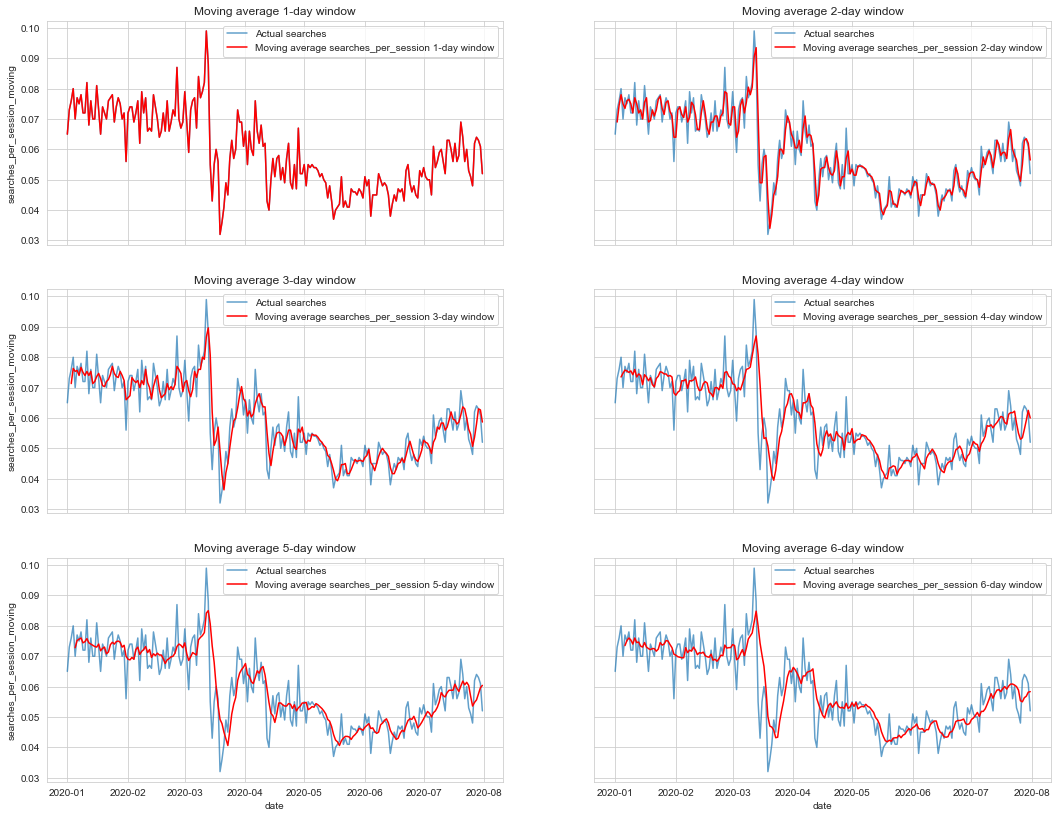

In [119]:
#Plot actuals versus moving averages
plot_moving_average(clean_df, 'searches_per_session', 6)

**Decomposing time series**

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [73]:
def plot_decomposition(dataf, value_column):
    
    #Create decomposition objects for both multiplicative and additive
    mult_decomp = seasonal_decompose(dataf[value_column], model='multiplicative', extrapolate_trend='freq')
    
    add_decomp = seasonal_decompose(dataf[value_column], model='additive', extrapolate_trend='freq')
    
    #Configuring subplot
    fig, axes = plt.subplots(4, 2, figsize=(18,14), sharex=True)
    
    #Plot components to subplot
    for idx, decomp in enumerate([mult_decomp, add_decomp]):
        
        decomp.observed.plot(ax=axes[0,idx], legend=False)
        axes[0,idx].set_ylabel('Observed')
        
        decomp.trend.plot(ax=axes[1,idx], legend=False)
        axes[1,idx].set_ylabel('Trend')
        
        decomp.seasonal.plot(ax=axes[2,idx], legend=False)
        axes[2,idx].set_ylabel('Seasonal')
        
        decomp.resid.plot(ax=axes[3,idx], legend=False)
        axes[3,idx].set_ylabel('Residual')
    
    #Set titles for columns
    axes[0,0].set_title('Multiplicative Decompose', fontweight='bold')
    axes[0,1].set_title('Additive Decompose', fontweight='bold')
       
    #mult_decomp.plot().suptitle('Multiplicative Decompose', fontsize=20)
    #add_decomp.plot().suptitle('Additive Decompose', fontsize=20)
    
    plt.show()   

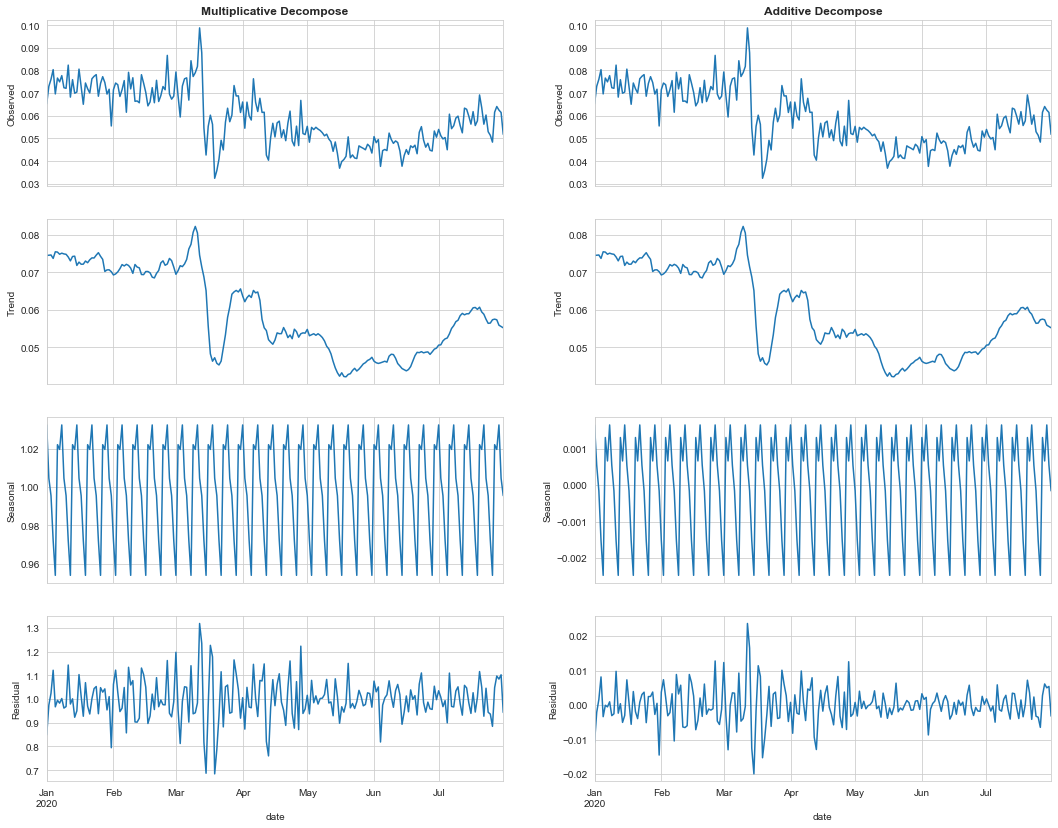

In [74]:
plot_decomposition(clean_df, 'searches_per_session')

**Test for stationarity**

In [20]:
from statsmodels.tsa.stattools import adfuller, kpss

In [75]:
#Function to test for stationarity (mean and variance remain constant over time)
def stationarity_test(dataf, value_column):
    
    #Augmented Dickey Fuller test
    adh_result = adfuller(dataf[value_column].values, autolag='AIC')
    print('ADF Statistic: {}'.format(adh_result[0]))
    print('p-value: {}'.format(adh_result[1]))
    print('\nCritical Values:')
    for key, value in adh_result[4].items():
        print(f'   {key}, {value}')
        
    if adh_result[0] < adh_result[4]['5%']:
        print('\nReject H0 - Time Series is Stationary')
    else:
        print('\nFailed to reject H0 - Time Series is Non-Stationary')

    #Kwiatkowski-Phillips-Schmidt-Shin Test
    kpss_result = kpss(dataf[value_column].values, regression='c')
    print('\nKPSS Statistic: {}'.format(kpss_result[0]))
    print('\np-value: {}'.format(kpss_result[1]))
    
    print('Critical Values:')
    for key, value in kpss_result[3].items():
        print(f'   {key}, {value}')
        
    if kpss_result[0] < kpss_result[3]['5%']:
        print("\nReject H0 - Time Series is Stationary")
    else:
        print("\nFailed to reject H0 - Time Series is Non-Stationary")

In [120]:
stationarity_test(clean_df, 'searches_per_session');

ADF Statistic: -2.4970876369134527
p-value: 0.11618454321604821

Critical Values:
   1%, -3.4620315036789666
   5%, -2.8754705024827127
   10%, -2.5741950726860647

Failed to reject H0 - Time Series is Non-Stationary

KPSS Statistic: 1.0260390735031368

p-value: 0.01
Critical Values:
   10%, 0.347
   5%, 0.463
   2.5%, 0.574
   1%, 0.739

Failed to reject H0 - Time Series is Non-Stationary


C:\Users\Casper Damen\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\Casper Damen\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**Remove trend from time series**

In [23]:
from scipy import signal

In [99]:
def plot_detrended(dataf, value_column):
    
    detrend_values = signal.detrend(dataf[value_column].values)
    
    plt.figure(figsize=(16,6))
    plt.plot(detrend_values)
    plt.title('Searches per sessions with trend removed', fontweight='bold')

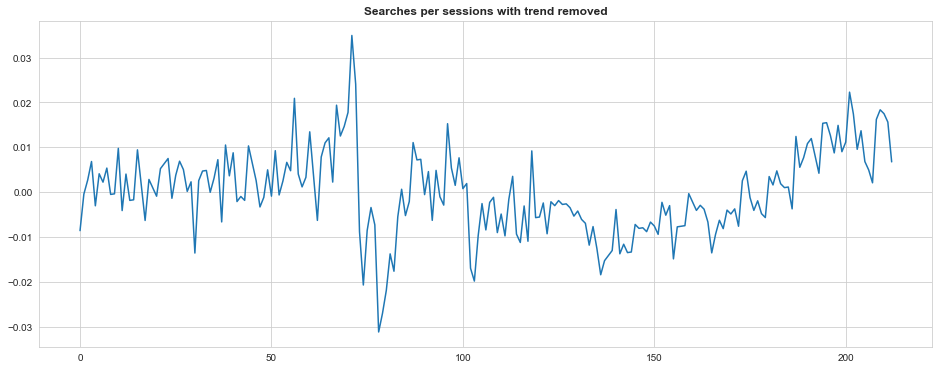

In [121]:
plot_detrended(clean_df, 'searches_per_session')

**Test seasonality from time series**

In [26]:
from pandas.plotting import autocorrelation_plot

In [101]:
def plot_seasonality(dataf, value_column):
    
    plt.figure(figsize=(16,6))
    plt.title('Seasonality', fontweight='bold')
    autocorrelation_plot(dataf[value_column].values)    

C:\Users\Casper Damen\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


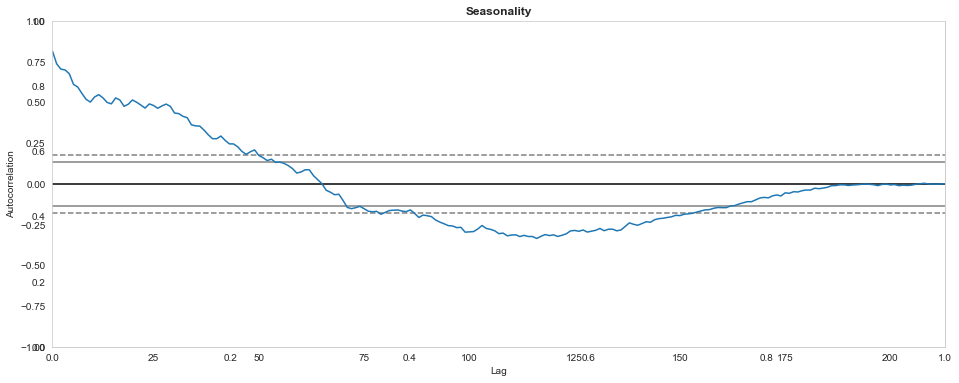

In [102]:
plot_seasonality(clean_df, 'searches_per_session');

**Autocorrelation**

In [29]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [105]:
def plot_autocorrelation(dataf, value_column):
    
    fig, axes = plt.subplots(1,2,figsize=(16,3))
    plot_acf(dataf[value_column].values, lags=50, ax=axes[0])
    plot_pacf(dataf[value_column].values, lags=50, ax=axes[1])

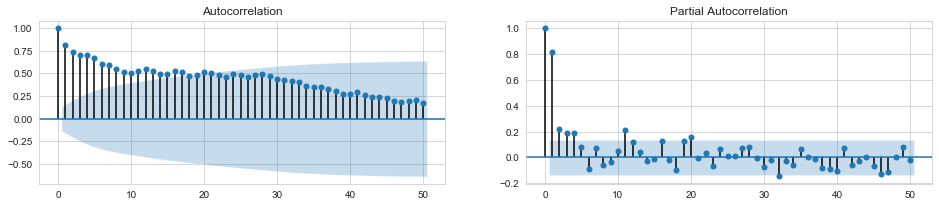

In [106]:
plot_autocorrelation(clean_df, 'searches_per_session')

**Lag plot**

In [32]:
from pandas.plotting import lag_plot

In [84]:
def plot_lag(dataf, value_column, lag_number):
    
    fig, axes = plt.subplots(1, lag_number, figsize=(30,6), sharex=True, sharey=True, dpi=100)
    for i, ax in enumerate(axes.flatten()[:lag_number]):
        lag_plot(dataf[value_column], lag=i+1, ax=ax, c='firebrick')
        ax.set_title('Lag ' + str(i+1))  

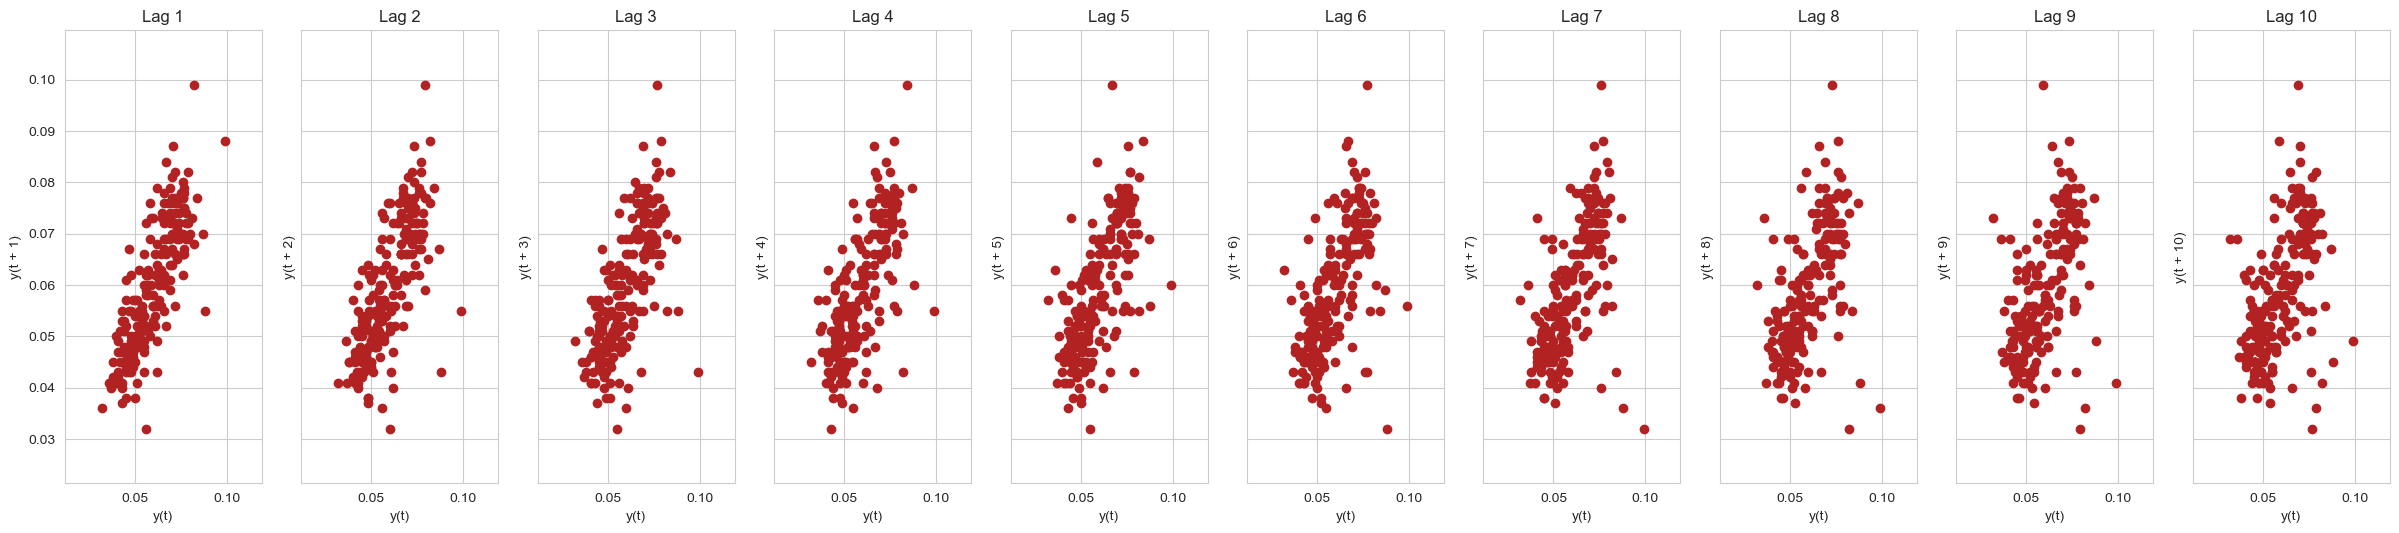

In [122]:
#Point get wider with increasing lag, meaning less correlation is identified
plot_lag(clean_df, 'searches_per_session', 10)

**Sample entropy**

In [148]:
#Measure of distortion in dataset
#The higher the sample entropy, the more distortion in the timeseries dataset
#In general, if you have lower possible values, the sample entropy will be lower
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [149]:
print(SampEn(clean_df['searches_per_session'], m=2, r=0.2*np.std(clean_df['searches_per_session'])))

1.3386242591017603


**Smoothen the time series**

In [64]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [162]:
def plot_smoothen(dataf, value_column):
    
    # Loess Smoothing (5% and 15%)
    df_loess_5 = (pd.DataFrame(lowess(dataf[value_column], 
                                      np.arange(len(dataf[value_column])), 
                                      frac=0.05)[:, 1], 
                                      index=dataf.index, 
                                      columns=[value_column])
                 )
                  
    df_loess_15 = (pd.DataFrame(lowess(dataf[value_column], 
                                      np.arange(len(dataf[value_column])), 
                                      frac=0.15)[:, 1], 
                                      index=dataf.index, 
                                      columns=[value_column])
                  )
                  
    # Plot
    fig, axes = plt.subplots(4,1, figsize=(16,12), sharex=True)
    dataf[value_column].plot(ax=axes[0], color='k', title='Original Series')
    df_loess_5[value_column].plot(ax=axes[1], title='Loess Smoothed 5%')
    df_loess_15[value_column].plot(ax=axes[2], title='Loess Smoothed 15%')
    
    #TO CONTINUE
    moving_average_df(dataf, value_column, window=3)['{}_moving'.format(value_column)].plot(ax=axes[3], title='Moving Average (3)')
    
    fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
    plt.show()

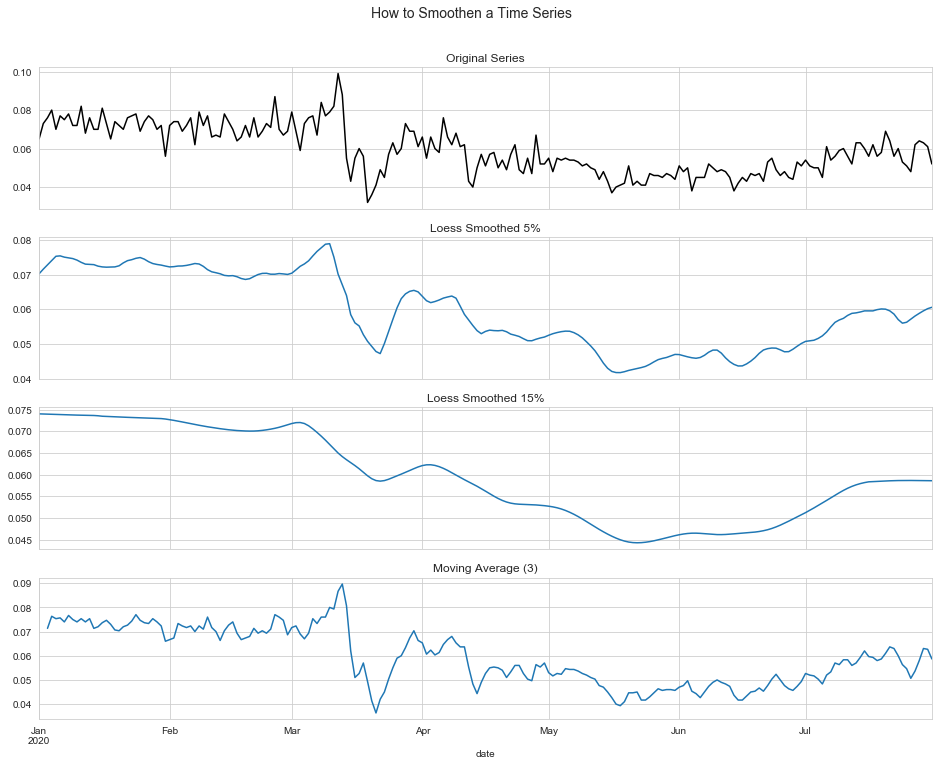

In [163]:
plot_smoothen(clean_df, 'searches_per_session')

**Granger Causality**

In [164]:
from statsmodels.tsa.stattools import grangercausalitytests

In [165]:
clean_df.head()

,searches,sessions,searches_per_session,year,month_number,month_name,day_number,day_name,week
date,,,,,,,,,
2020-01-01,602,9218,0.065,2020,1,January,2,Wednesday,00
2020-01-02,1284,17588,0.073,2020,1,January,3,Thursday,00
2020-01-03,1246,16371,0.076,2020,1,January,4,Friday,00
2020-01-04,908,11299,0.080,2020,1,January,5,Saturday,00
2020-01-05,869,12477,0.070,2020,1,January,6,Sunday,00


In [168]:
#Check if a time series is useful in forecasting anothre time series
#If the p-values are < 0.05, the time series might be useful to predict another time series
#Week and month seem interesting
grangercausalitytests(clean_df[['searches_per_session', 'month_number']], maxlag=2);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.6113 , p=0.0000  , df_denom=209, df_num=1
ssr based chi2 test:   chi2=17.8641 , p=0.0000  , df=1
likelihood ratio test: chi2=17.1512 , p=0.0000  , df=1
parameter F test:         F=17.6113 , p=0.0000  , df_denom=209, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.8416  , p=0.0034  , df_denom=206, df_num=2
ssr based chi2 test:   chi2=11.9667 , p=0.0025  , df=2
likelihood ratio test: chi2=11.6397 , p=0.0030  , df=2
parameter F test:         F=5.8416  , p=0.0034  , df_denom=206, df_num=2


In [169]:
grangercausalitytests(clean_df[['searches_per_session', 'day_number']], maxlag=2);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6602  , p=0.4174  , df_denom=209, df_num=1
ssr based chi2 test:   chi2=0.6697  , p=0.4132  , df=1
likelihood ratio test: chi2=0.6686  , p=0.4135  , df=1
parameter F test:         F=0.6602  , p=0.4174  , df_denom=209, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2921  , p=0.7470  , df_denom=206, df_num=2
ssr based chi2 test:   chi2=0.5984  , p=0.7414  , df=2
likelihood ratio test: chi2=0.5976  , p=0.7417  , df=2
parameter F test:         F=0.2921  , p=0.7470  , df_denom=206, df_num=2


In [170]:
grangercausalitytests(clean_df[['searches_per_session', 'week']], maxlag=2);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.9630 , p=0.0000  , df_denom=209, df_num=1
ssr based chi2 test:   chi2=18.2209 , p=0.0000  , df=1
likelihood ratio test: chi2=17.4800 , p=0.0000  , df=1
parameter F test:         F=17.9630 , p=0.0000  , df_denom=209, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.4462  , p=0.0050  , df_denom=206, df_num=2
ssr based chi2 test:   chi2=11.1568 , p=0.0038  , df=2
likelihood ratio test: chi2=10.8719 , p=0.0044  , df=2
parameter F test:         F=5.4462  , p=0.0050  , df_denom=206, df_num=2
